In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Read data to Python Environment

In [2]:
data = pd.read_excel("iris_assg.xlsx")

In [3]:
data.head(10)

,SL,SW,PL,PW,Classification
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,NaN,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
5,5.4,3.9,1.7,0.4,Iris-setosa
6,4.6,3.4,1.4,0.3,Iris-setosa
7,5.0,3.4,1.5,0.2,Iris-setosa
8,4.4,2.9,1.4,0.2,Iris-setosa
9,4.9,3.1,1.5,0.1,Iris-setosa


# Exploratory Data Analysis

In [4]:
data.shape

(150, 5)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   SL              143 non-null    float64
 1   SW              144 non-null    float64
 2   PL              144 non-null    float64
 3   PW              150 non-null    float64
 4   Classification  150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


**From above , the dataset has five variables, One object type variable(Target variable) and four other numerical independent variables.**

In [6]:

data.columns

Index(['SL', 'SW', 'PL', 'PW', 'Classification'], dtype='object')

In [7]:
data.describe()

,SL,SW,PL,PW
count,143.000000,144.000000,144.000000,150.000000
mean,5.855944,3.049306,3.756250,1.198667
std,0.828168,0.430644,1.761306,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [8]:
classifications = data["Classification"].value_counts()

In [9]:
classifications

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: Classification, dtype: int64

**Clearly from above the target variable is dependent categorical value and it is better to use logistic Regression**.

In [10]:
data.isnull().sum()

SL                7
SW                6
PL                6
PW                0
Classification    0
dtype: int64

**from above there are some missing values and the data should be cleaned by filling null values ,checking and removing outliers any.**

# Filling Null Values

In [11]:
for i in ["SL","SW","PL"]:
    data[i]= data[i].fillna(data[i].mode()[0])

In [12]:
data.isnull().sum()

SL                0
SW                0
PL                0
PW                0
Classification    0
dtype: int64

# visualizing and understanding distribution of numerical data.

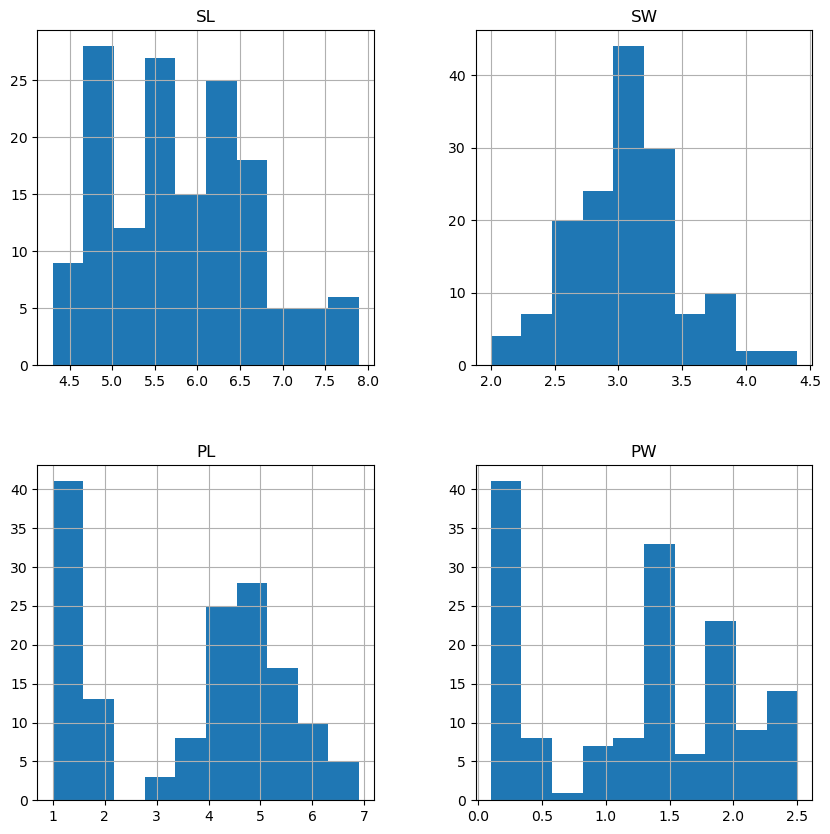

In [13]:
freqdata = data.select_dtypes(include="float64")
freqdata.hist(figsize =(10,10))
plt.show()

# Outlier detection

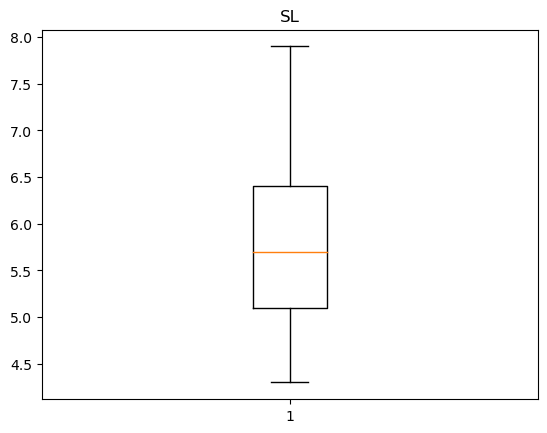

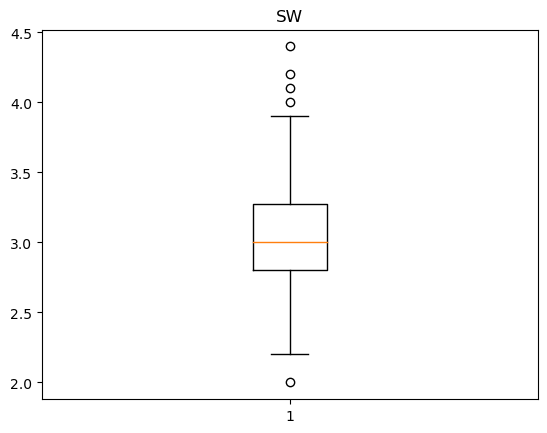

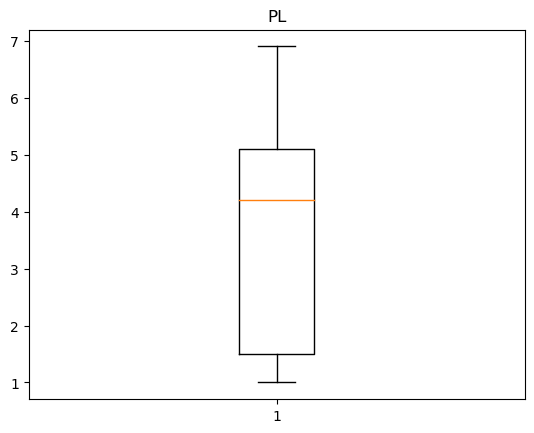

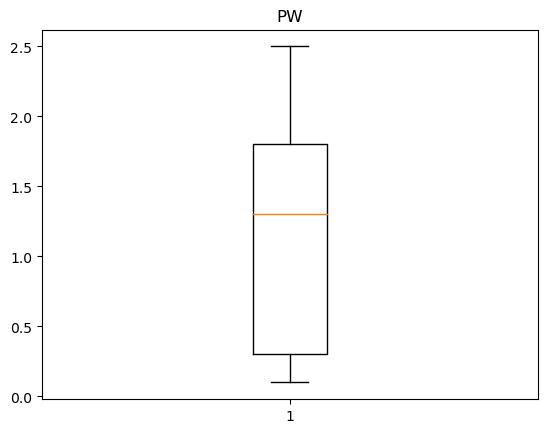

In [14]:
num_col = ['SL','SW',"PL","PW"]
for i in num_col:
  plt.figure()
  plt.boxplot(data[i])
  plt.title(i)

**from above it is understood that only Specification Sepal Width(SW) has some outliers.**

**Next, remove Outlier.**

In [15]:
q1 = np.percentile(data['SW'] , 25,method="midpoint")
q1

2.8

In [16]:
q2 = np.percentile(data['SW'] ,50,method="midpoint")
q2

3.0

In [17]:
q3 = np.percentile(data['SW'], 75,method="midpoint")
q3

3.25

In [18]:
iqr = q3 - q1

In [19]:
low_limit = q1 - 1.5*iqr
up_limit = q3 + 1.5*iqr     

In [20]:
print(low_limit)
print(up_limit)

2.1249999999999996
3.9250000000000003


In [21]:
outlier =[]
for x in data['SW']:
  if((x>up_limit) or (x<low_limit)):
     
        outlier.append(x)

In [22]:
outlier

[4.0, 4.4, 4.1, 4.2, 2.0]

In [23]:
ind1 = data['SW'] > up_limit
data.loc[ind1].index

Int64Index([14, 15, 32, 33], dtype='int64')

In [24]:
data.drop([14,15,32,33], inplace =True)

**Outliers are dropped and the data is almost clean.**

In [25]:
data.head(20)

,SL,SW,PL,PW,Classification
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,5.0,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
5,5.4,3.9,1.7,0.4,Iris-setosa
6,4.6,3.4,1.4,0.3,Iris-setosa
7,5.0,3.4,1.5,0.2,Iris-setosa
8,4.4,2.9,1.4,0.2,Iris-setosa
9,4.9,3.1,1.5,0.1,Iris-setosa


In [26]:
data.shape

(146, 5)

# Performing Encoding for Catergorical value.

In [27]:
from sklearn.preprocessing import LabelEncoder

In [28]:
le= LabelEncoder()

In [29]:
data["Classification"] = le.fit_transform(data["Classification"])
data["Classification"]

0      0
1      0
2      0
3      0
4      0
      ..
145    2
146    2
147    2
148    2
149    2
Name: Classification, Length: 146, dtype: int32

In [30]:
data

,SL,SW,PL,PW,Classification
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,5.0,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,1.5,2.0,2
148,6.2,3.4,5.4,2.3,2


In [31]:
data["Classification"].unique()

array([0, 1, 2])

# Perfroming Logistic Regression

In [32]:
y = data["Classification"]
x = data.drop(['Classification'],axis=1)

In [33]:
from sklearn.model_selection import train_test_split

In [34]:
x_train,x_test,y_train,y_test = train_test_split(x,y, test_size = 0.2, random_state=42)

In [35]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()

In [36]:
model = lr.fit(x_train,y_train)

In [37]:
y_predictions = model.predict(x_test)

In [38]:
from sklearn.metrics import confusion_matrix,accuracy_score

In [39]:
from sklearn.metrics import precision_score,recall_score,f1_score

In [40]:
confusion_matrix(y_test,y_predictions)

array([[12,  0,  0],
       [ 0,  7,  1],
       [ 0,  1,  9]], dtype=int64)

In [41]:
y_predictions

array([0, 2, 0, 0, 0, 2, 0, 1, 2, 0, 0, 1, 2, 1, 2, 0, 1, 2, 0, 1, 2, 2,
       0, 1, 0, 1, 1, 2, 2, 0])

In [42]:
print("accuracy =",accuracy_score(y_test,y_predictions))

accuracy = 0.9333333333333333


In [43]:
print("precision =",precision_score(y_test,y_predictions,pos_label='positive',average='micro'))

precision = 0.9333333333333333


C:\Users\skshe\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1521: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn(


In [44]:
print("recall_score=",recall_score(y_test,y_predictions,pos_label='positive',average='micro'))

recall_score= 0.9333333333333333


C:\Users\skshe\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1521: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn(


In [45]:
print("f1_score =",f1_score(y_test,y_predictions,pos_label='positive',average='micro'))

f1_score = 0.9333333333333333


C:\Users\skshe\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1521: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn(


# Perfroming KNeighborsClassifier Algorithm

In [46]:
from sklearn.neighbors import KNeighborsClassifier

In [47]:
metric_k =[]

In [48]:
neighbors = np.arange(3,15)

In [49]:
for k in neighbors:
    classifier = KNeighborsClassifier(n_neighbors =k, metric='euclidean')
    classifier.fit(x_train,y_train)
    y_pred = classifier.predict(x_test)
    acc = accuracy_score(y_test,y_pred)
    metric_k.append(acc)

In [50]:
metric_k

[0.9666666666666667,
 0.9666666666666667,
 0.9666666666666667,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 0.9666666666666667,
 0.9666666666666667,
 0.9666666666666667]

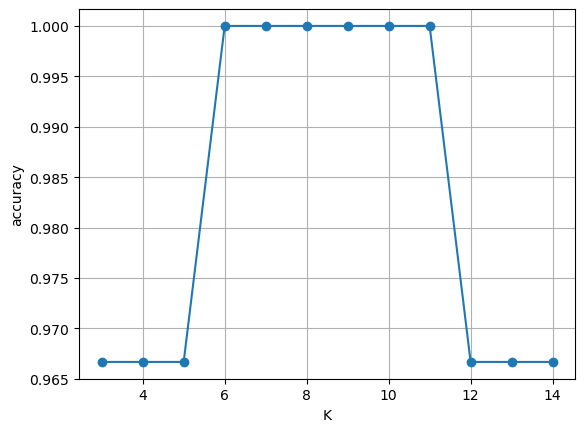

In [51]:
plt.plot(neighbors,metric_k,'o-')
plt.xlabel('K')
plt.ylabel('accuracy')
plt.grid()

In [52]:
classifier = KNeighborsClassifier(n_neighbors =5, metric='euclidean')
classifier.fit(x_train,y_train)
y_pred = classifier.predict(x_test)
acc = accuracy_score(y_test,y_pred)
metric_k.append(acc)

In [53]:
print("accuracy =",accuracy_score(y_test,y_pred,))
print("precision =",precision_score(y_test,y_pred,pos_label='positive',average='micro'))
print("recall_score=",recall_score(y_test,y_pred,pos_label='positive',average='micro'))
print("f1_score =",f1_score(y_test,y_pred,pos_label='positive',average='micro'))

accuracy = 0.9666666666666667
precision = 0.9666666666666667
recall_score= 0.9666666666666667
f1_score = 0.9666666666666667


C:\Users\skshe\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1521: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn(
C:\Users\skshe\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1521: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn(
C:\Users\skshe\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1521: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn(


In [54]:
confusion_matrix(y_test,y_pred)

array([[12,  0,  0],
       [ 0,  7,  1],
       [ 0,  0, 10]], dtype=int64)

**The KNegibhor performs with better scores based on their accuracy,precision,recall_score and f1_score.**

# SWM Algorithm

In [55]:
from sklearn.svm import SVC
svm_cls= SVC(kernel="linear")
swm_cls = svm_cls.fit(x_train,y_train)
y_pred_svm = svm_cls.predict(x_test)

In [56]:
from sklearn.metrics import confusion_matrix,accuracy_score

In [57]:
confusion_matrix(y_test,y_pred_svm)

array([[12,  0,  0],
       [ 0,  7,  1],
       [ 0,  1,  9]], dtype=int64)

In [58]:
accuracy_score(y_test,y_pred_svm)

0.9333333333333333

In [59]:
svm_cls1 = SVC(kernel ='rbf')
svm_cls1 = svm_cls1.fit(x_train,y_train)

In [60]:
y_pred_svm1 =svm_cls1.predict(x_test)

In [61]:
confusion_matrix(y_test,y_pred_svm1)

array([[12,  0,  0],
       [ 0,  8,  0],
       [ 0,  2,  8]], dtype=int64)

In [62]:
accuracy_score(y_test,y_pred_svm1)

0.9333333333333333

In [63]:
from sklearn.tree import DecisionTreeClassifier

In [64]:
dt_cls = DecisionTreeClassifier()

In [65]:
model = dt_cls.fit(x_train,y_train)

In [66]:
y_pred_dt = model.predict(x_test)

In [67]:
confusion_matrix(y_test,y_pred_dt)

array([[12,  0,  0],
       [ 0,  7,  1],
       [ 0,  1,  9]], dtype=int64)

In [68]:
accuracy_score(y_test,y_pred_dt)

0.9333333333333333

# Random Forest Algorithm

In [69]:
from sklearn.ensemble import RandomForestClassifier

In [70]:
rf_cls =RandomForestClassifier()

In [71]:
model_rf = rf_cls.fit(x_train,y_train)

In [72]:
y_pred_rf = model_rf.predict(x_test)

In [73]:
confusion_matrix(y_test,y_pred_rf)

array([[12,  0,  0],
       [ 0,  7,  1],
       [ 0,  1,  9]], dtype=int64)

In [74]:
accuracy_score(y_test,y_pred_rf)

0.9333333333333333

In [75]:
from sklearn.ensemble import RandomForestClassifier

In [76]:
rf_cls =RandomForestClassifier(n_estimators =12)

In [77]:
model_rf = rf_cls.fit(x_train,y_train)

In [78]:
y_pred_rf = model_rf.predict(x_test)

In [79]:
confusion_matrix(y_test,y_pred_rf)

array([[12,  0,  0],
       [ 0,  7,  1],
       [ 0,  1,  9]], dtype=int64)

In [80]:
accuracy_score(y_test,y_pred_rf)

0.9333333333333333

# Performance Comparison

**From above it is clear that among these algorithm the KNeighbor Algorithm perfrom best in this Iris data set having four independent variable.In the case of logisitic regression it is easy to train and predict data but The KNegibhor performs with better scores based on their accuracy,precision,recall_score and f1_score.Comparing to other algorithm used KNeighbor is the best fit model in this dataset.**